Imports necesarios para usar numpy arrays.

In [1]:
import numpy as np

Imports necesarios para extraer datos de un archivo csv.

In [2]:
import pandas as pd

Imports necesarios para la matriz de resultados.

In [3]:
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

Imports necesarios para dividir entre datos de entrenamiento y test.

In [4]:
from sklearn.model_selection import train_test_split

Imports necesarios para que funcione RandomForest.

In [5]:
from sklearn.ensemble import RandomForestClassifier

Imports necesarios para poder ver los arboles de decision que usa Random Forest

In [6]:
from sklearn import tree

### Ruta donde se encuentra el dataset

In [7]:
filename = 'G:/datos/data/fer2013/fer2013RandomForest.csv'

#### NOTA: en este archivo csv se ha omitido la columna 'Usage', posteriormente se usara un 25% del dataset para test

### Definimos las expresiones faciales disponibles

In [8]:
expressions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

### Leemos el archivo csv usando la libreria pandas, las columnas estan delimitadas por ";", por eso lo indicamos

In [9]:
df=pd.read_csv(filename,sep=";")
df

,emotion,pixels1,pixels.2,pixels.3,pixels.4,pixels.5,pixels.6,pixels.7,pixels.8,pixels.9,...,pixels.2295,pixels.2296,pixels.2297,pixels.2298,pixels.2299,pixels.2300,pixels.2301,pixels.2302,pixels.2303,pixels.2304
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,2,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,4,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,6,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35882,6,50,36,17,22,23,29,33,39,34,...,216,215,216,217,221,222,220,223,221,216
35883,3,178,174,172,173,181,188,191,194,196,...,147,141,136,118,66,7,0,0,0,0
35884,0,17,17,16,23,28,22,19,17,25,...,190,179,193,193,194,170,148,154,133,113
35885,3,30,28,28,29,31,30,42,68,79,...,30,27,27,26,28,35,35,35,30,28


### Dividimos los datos entre la foto en pixeles y las etiquetas (emociones)

In [24]:
df_x = df.iloc[:,1:]
df_y = df.iloc[:,0]

### Preparamos los datos e indicamos que para los test se usara un 25% de los datos

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(df_x,df_y,test_size=0.25,random_state=0)

In [20]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


### Usamos RandomForest y llamamos a fit

In [12]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Almacenamos las predicciones en una variable y las reales en otra variable

In [13]:
Y_predicted = rf.predict(X_test)
Y_real = Y_test

### Creamos una matriz de confusion para analizar resultados

In [14]:
cm = confusion_matrix(Y_real, Y_predicted)

### Pintamos el porcentaje de acierto y la matriz

Porcentaje de acierto:  0.4621043245653143


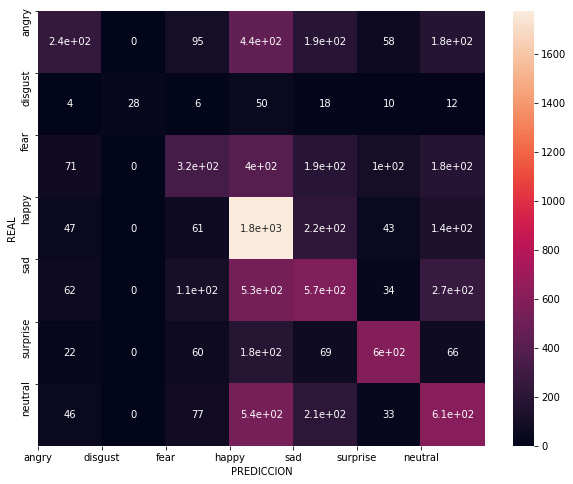

In [15]:
y_pos = np.arange(len(expressions))
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True)
plt.xlabel('PREDICCION')
plt.ylabel('REAL')
plt.xticks(y_pos,expressions)
plt.yticks(y_pos,expressions)
print("Porcentaje de acierto: ", rf.score(X_test,Y_test))


#### NOTA: como se puede apreciar las emociones 0, 1 y 2 ('angry','disgust','fear') no tienen buenos resultados.

In [16]:
fig, axes = plt.subplots(figsize = (5,5), dpi=900)
tree.plot_tree(rf.estimators_[0],
               feature_names = X_train.columns, 
               class_names= expressions);
fig.savefig('arbol.png')

Error in callback <function flush_figures at 0x000002425371F558> (for post_execute):


KeyboardInterrupt: 